In [141]:
import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn import pipeline
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
# Load the dataset
#Stationær
df = pd.read_csv(r'C:\Users\Daniel K\OneDrive\Desktop\DAKI\1. Semester\DAKI-opg\daki_p1\Rensetdata.csv')
#Bærbar
#df = pd.read_csv("/Users/daniel_kristensen/DAKI/opgaver/DAKI-opg/daki_p1/Rensetdata.csv")


# Define features and target variable
features = ['Cholesterol', 'RestingBP', 'Age', 'FastingBS', 'MaxHR', 'Sex_M', 
            'ExerciseAngina_Y', 'RestingECG_ST', 'ChestPainType_TA', 
            'ChestPainType_ATA', 'ChestPainType_NAP', 'RestingECG_Normal']
target = 'HeartDisease'

X = df[features]
y = df[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)


# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

In [142]:
log_reg =  Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='saga', C=0.01, random_state=13))])

svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel="rbf", random_state=13))
])

rf = RandomForestClassifier(
min_samples_leaf= 4, min_samples_split=10, n_estimators=200, random_state=13
)

In [143]:
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='saga', C=0.01, random_state=13))
])

cv_results = cross_validate(log_reg, X_train, y_train, cv=20, scoring=scoring)

print("Mean cross-validation accuracy:", cv_results['test_accuracy'].mean())
print("Mean cross-validation precision:", cv_results['test_precision'].mean())
print("Mean cross-validation recall:", cv_results['test_recall'].mean())
print("Mean cross-validation F1 score:", cv_results['test_f1'].mean())

Mean cross-validation accuracy: 0.80935960591133
Mean cross-validation precision: 0.8109640830016218
Mean cross-validation recall: 0.8643750000000001
Mean cross-validation F1 score: 0.8323767373518324


In [144]:
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel="rbf", random_state=13))])

cv_svm = cross_validate(svm, X_train, y_train, cv=20, scoring=scoring)

print("Mean cross-validation accuracy:", cv_svm['test_accuracy'].mean())
print("Mean cross-validation precision:", cv_svm['test_precision'].mean())
print("Mean cross-validation recall:", cv_svm['test_recall'].mean())
print("Mean cross-validation F1 score:", cv_svm['test_f1'].mean())

Mean cross-validation accuracy: 0.8340517241379309
Mean cross-validation precision: 0.8480324562348557
Mean cross-validation recall: 0.8639583333333334
Mean cross-validation F1 score: 0.851007689850808


In [145]:
rf = RandomForestClassifier(
#max_depth = 20, max_features='sqrt', min_samples_leaf= 7, min_samples_split=11, n_estimators= 205,random_state=13
min_samples_leaf= 4, 
min_samples_split=10, 
n_estimators=200, 
random_state=13
)


cv_rf = cross_validate(rf, X_train, y_train, cv=20, scoring=scoring)

print("Mean cross-validation accuracy:", cv_rf['test_accuracy'].mean())
print("Mean cross-validation precision:", cv_rf['test_precision'].mean())
print("Mean cross-validation recall:", cv_rf['test_recall'].mean())
print("Mean cross-validation F1 score:", cv_rf['test_f1'].mean())

Mean cross-validation accuracy: 0.8269088669950738
Mean cross-validation precision: 0.845843835387179
Mean cross-validation recall: 0.8516666666666668
Mean cross-validation F1 score: 0.8429719087048309


In [150]:

# Create voting classifier
voting_model = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('svm', svm),
        ('rf', rf)
    ],
    voting='soft'  
)

cv_results = cross_validate(voting_model, X_train, y_train, cv=20, scoring=scoring)

#Reaults
print("Stack:")
print("Mean cross-validation accuracy:", cv_results['test_accuracy'].mean())
print("Mean cross-validation precision:", cv_results['test_precision'].mean())
print("Mean cross-validation recall:", cv_results['test_recall'].mean())
print("Mean cross-validation F1 score:", cv_results['test_f1'].mean())

Stack:
Mean cross-validation accuracy: 0.8339285714285716
Mean cross-validation precision: 0.8443790967804125
Mean cross-validation recall: 0.8670833333333334
Mean cross-validation F1 score: 0.8509290162706133


In [161]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Custom threshold value
threshold = 0.376

def evaluate_threshold(voting_model, X_train, y_train, X_test, y_test, threshold):
    voting_model.fit(X_train, y_train)

    y_pred_proba = voting_model.predict_proba(X_test)[:, 1]

    y_pred_custom = (y_pred_proba >= threshold).astype(int)

    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    accuracy = accuracy_score(y_test, y_pred_custom)

    return y_pred_custom, precision, recall, f1, accuracy

# Custom threshold
y_pred_custom, precision, recall, f1, accuracy = evaluate_threshold(
    voting_model, X_train, y_train, X_test, y_test, threshold
)

# Print results
print(f"Custom Threshold Metrics at Threshold {threshold}:")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Custom Threshold Metrics at Threshold 0.376:
F1 Score: 0.8352941176470589
Accuracy: 0.8055555555555556
Precision: 0.7802197802197802
Recall: 0.8987341772151899


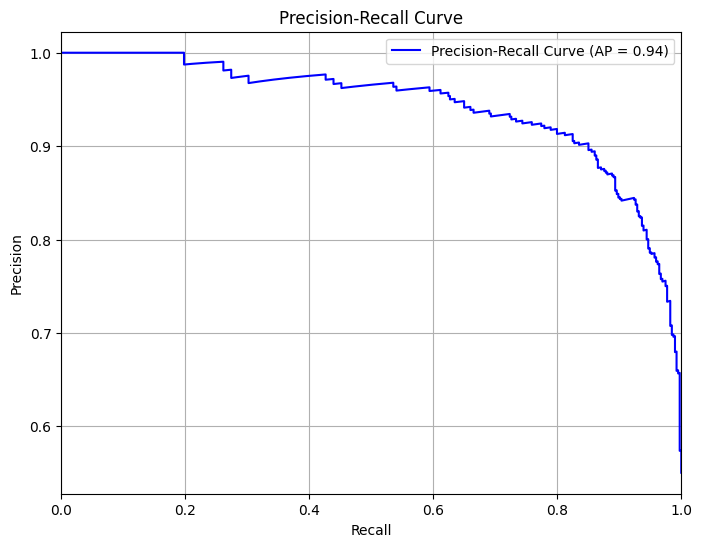

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_predict



voting_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_proba_positive = voting_model.predict_proba(X)[:, 1]


# Compute precision-recall metrics
precision, recall, thresholds = precision_recall_curve(y, y_proba_positive)
avg_precision = average_precision_score(y, y_proba_positive)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.show()